In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import userlib.util as tools
import scipy.stats as st
import userlib.RVgenerator as RVG
%matplotlib inline


In [4]:
rvs = np.arange(1,101,1)
print (rvs)
rvs_obs = np.array([1,4,95,38,27,59])
print (st.ks_2samp(np.diff(rvs), np.diff(rvs_obs)))
print (st.ks_2samp(rvs, rvs_obs))

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
KstestResult(statistic=0.6, pvalue=0.035239095231405004)
KstestResult(statistic=0.29333333333333333, pvalue=0.6176131536479118)


In [ ]:
mc_times = 1000
pi, kappa, eta = 0.5, 0., 0.
epochs = 101
epsilon = 1.0
bmi = 3

rvs_simul = []
dtrvsq_simul = []
sigma_simul = []
dtrvMax_simul = []
dtrv_any2 = []
for n in range(mc_times):
    p = tools.getOrbitalParameters(pi, kappa, eta)
    P, q, e, m1, i, omega, T0 = p[0], p[1], p[2], p[3], p[4], p[5], p[6]
    phases = np.random.random(epochs) # This is a key difference to the S13 and HBM, which make the precalculated approach feasible.
    rvs = RVG.getRvsByPhases(P*86400., q, e, m1, i, omega, phases)
    rvs += np.random.normal(0, epsilon, epochs)
    rvs -= rvs[bmi]
    rvs_simul.append(rvs)
    dtrvsq_simul.append(np.diff(rvs))
    sigma_simul.append(np.std(rvs))
    dtrvMax_simul.append(np.ptp(rvs))
    # for i in range(len(rvs)-1):
    #     for j in range(i+1,len(rvs)):
    #         dtrv_any2.append(abs(rvs[j]-rvs[i]))
rvs_simul = np.ndarray.flatten(np.array(rvs_simul))
dtrvsq_simul = np.ndarray.flatten(np.array(dtrvsq_simul))
sigma_simul = np.array(sigma_simul)
dtrvMax_simul = np.array(dtrvMax_simul)
# dtrv_any2_simul = np.array(dtrv_any2)


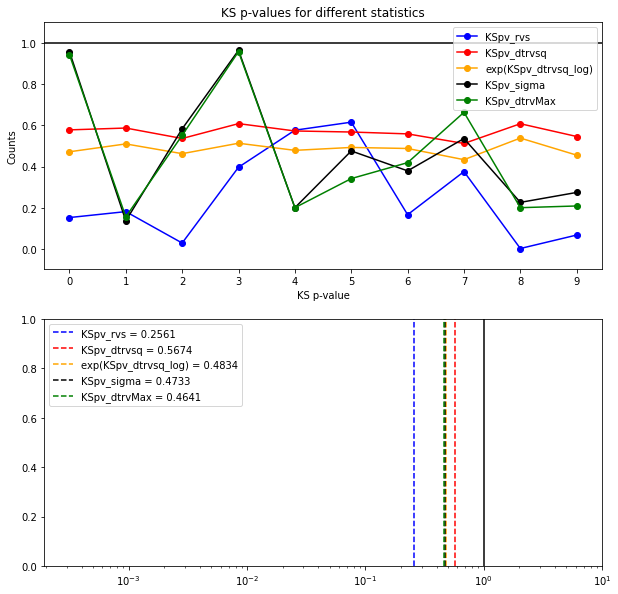

In [ ]:
pi, kappa, eta = 0.5, 0., 0.
KSpv_rvs = []
KSpv_dtrvsq = []
KSpv_dtrvsq_log = []
KSpv_sigma = []
KSpv_dtrvMax = []
# KSpv_dtrv_any2 = []
epochs = 6

for a in range(10):
    rvs_obs = []
    dtrvsq_obs = []
    dtrvsq_KSpv = []
    dtrvsq_KSpv_log = []
    sigma_obs = []
    dtrvMax_obs = []
    dtrv_any2_obs = []
    for n in range(100):
        p = tools.getOrbitalParameters(pi, kappa, eta)
        P, q, e, m1, i, omega, T0 = p[0], p[1], p[2], p[3], p[4], p[5], p[6]
        phases = np.random.random(epochs)
        rvs = RVG.getRvsByPhases(P*86400., q, e, m1, i, omega, phases)
        rvs += np.random.normal(0, epsilon, epochs)
        rvs -= rvs[bmi]
        rvs_obs.append(rvs)
        # dtrvsq_obs.append(np.diff(rvs))
        value = st.ks_2samp(np.diff(rvs), dtrvsq_simul)[1]
        dtrvsq_KSpv.append(value)
        dtrvsq_KSpv_log.append(np.log(value))
        sigma_obs.append(np.std(rvs))
        dtrvMax_obs.append(np.ptp(rvs))
        # for i in range(len(rvs)-1):
        #     for j in range(i+1,len(rvs)):
        #         dtrv_any2_obs.append(abs(rvs[j]-rvs[i]))

    rvs_obs = np.ndarray.flatten(np.array(rvs_obs))
    # dtrvsq_obs = np.ndarray.flatten(np.array(dtrvsq_obs))

    KSpv_rvs.append(st.ks_2samp(rvs_obs, rvs_simul)[1])
    KSpv_dtrvsq.append(np.mean(dtrvsq_KSpv))
    KSpv_dtrvsq_log.append(np.mean(dtrvsq_KSpv_log))
    # KSpv_dtrvsq.append(st.ks_2samp(dtrvsq_obs, dtrvsq_simul)[1])
    # KSpv_dtrv_any2.append(st.ks_2samp(dtrvsq_obs, dtrv_any2_simul)[1])
    # KSpv_dtrv_any2.append(st.ks_2samp(dtrv_any2_obs, dtrv_any2_simul)[1])
    KSpv_sigma.append(st.ks_2samp(sigma_obs, sigma_simul)[1])
    KSpv_dtrvMax.append(st.ks_2samp(dtrvMax_obs, dtrvMax_simul)[1])

plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title('KS p-values for different statistics')
# plt.yscale('log')
# plt.ylim(np.min([KSpv_rvs,KSpv_dtrvMax,KSpv_sigma,KSpv_dtrvMax])/10, 10)
plt.ylim(-0.1, 1.1)
plt.xlabel('KS p-value')
plt.ylabel('Counts')
plt.axhline(1, color='k')
plt.plot(KSpv_rvs, '-o', color='blue', alpha=1, label='KSpv_rvs')
plt.plot(KSpv_dtrvsq, '-o', color='red', alpha=1, label='KSpv_dtrvsq')
plt.plot(np.exp(KSpv_dtrvsq_log), '-o', color='orange', alpha=1, label='exp(KSpv_dtrvsq_log)')
plt.plot(KSpv_sigma, '-o', color='k', alpha=1, label='KSpv_sigma')
plt.plot(KSpv_dtrvMax, '-o', color='green', alpha=1, label='KSpv_dtrvMax')
plt.xticks(np.arange(0, 10))
plt.legend()

plt.subplot(212)
plt.xlim(np.min([KSpv_rvs,KSpv_dtrvMax,KSpv_sigma,KSpv_dtrvMax])/10, 10)
plt.xscale('log')
plt.axvline(1, color='k')
plt.axvline(np.mean(KSpv_rvs), color='blue', linestyle='--', label='KSpv_rvs = %.4f' % np.mean(KSpv_rvs))
plt.axvline(np.mean(KSpv_dtrvsq), color='red', linestyle='--', label='KSpv_dtrvsq = %.4f' % np.mean(KSpv_dtrvsq))
plt.axvline(np.mean(np.exp(KSpv_dtrvsq_log)), color='orange', linestyle='--', label='exp(KSpv_dtrvsq_log) = %.4f' % np.exp(np.mean(KSpv_dtrvsq_log)))
plt.axvline(np.mean(KSpv_sigma), color='k', linestyle='--', label='KSpv_sigma = %.4f' % np.mean(KSpv_sigma))
plt.axvline(np.mean(KSpv_dtrvMax), color='green', linestyle='--', label='KSpv_dtrvMax = %.4f' % np.mean(KSpv_dtrvMax))
plt.legend()
plt.show()
plt.close()

print (tools.now())

In [43]:

print ((np.exp(KSpv_dtrvsq_log)) / (KSpv_dtrvsq))

[0.81605335 0.86859463 0.86259893 0.8434994  0.83565451 0.86805033
 0.87304122 0.84634468 0.88534423 0.8340263 ]


In [69]:

binaries_obs = np.load('./binary/MockSamples/epsilon(1.00)/binary/pi(1.50)/kappa(0.00)/eta(0.00)/binary(2000)epochs(06)epsilon(1.00)P(1,1400)q(0.1,1.0)e(0.0,0.9)m1(1,10)_(1.50,0.00,0.00).npy', allow_pickle=True)
singleStars_obs = np.load('binary/MockSamples/epsilon(0.10)/singleStar/singleStar(2000)epochs(06)epsilon(0.10).npy', allow_pickle=True)
sampleSize = 200
fbin_true = 1
samples = binaries_obs[:round(sampleSize*fbin_true)]
samples = np.concatenate((samples, singleStars_obs[:round(sampleSize * (1-fbin_true))]))

list_dtajrv_obs = []
for i in range(len(samples)):
    list_dtajrv_obs.append(np.diff(samples[i]['rvs']))
list_dtajrv_obs = np.ndarray.flatten(np.array(list_dtajrv_obs))

In [46]:
def mmd_rbf(X, Y):
    from sklearn.metrics import pairwise_kernels
    
    XX = pairwise_kernels(X, X, metric='rbf')
    YY = pairwise_kernels(Y, Y, metric='rbf')
    XY = pairwise_kernels(X, Y, metric='rbf')
    
    return XX.mean() + YY.mean() - 2 * XY.mean()

In [47]:
def ks_composite_score(data1, data2):
    # 计算 KS 统计量和 p 值
    D, p = st.ks_2samp(data1, data2)
    
    # 样本量
    n1 = len(data1)
    n2 = len(data2)
    
    # 样本量调整因子
    sample_factor = np.sqrt((n1 * n2) / (n1 + n2))
    
    # 综合得分
    score = D * sample_factor * p#(1 - p)
    return score

In [62]:
from scipy.spatial.distance import jensenshannon
from scipy.stats import anderson_ksamp
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

binaries = np.load('./binary/MockSamples/epsilon(1.00)/binary/pi(0.00)/kappa(0.00)/eta(0.00)/binary(2000)epochs(06)epsilon(1.00)P(1,1400)q(0.1,1.0)e(0.0,0.9)m1(1,10)_(0.00,0.00,0.00).npy', allow_pickle=True)
singleStars = np.load('binary/MockSamples/epsilon(0.10)/singleStar/singleStar(2000)epochs(06)epsilon(0.10).npy', allow_pickle=True)
list_sim = []
grid_fbin = np.arange(0.01, 1.01, 0.01)
for fbin in grid_fbin:
    list_dtajrv_simul = []
    samples_simul = np.r_[binaries[:round(len(binaries)*fbin)], singleStars[:round(len(binaries)*(1-fbin))]]
    for g in samples_simul:
        list_dtajrv_simul.append(np.diff(g['rvs']))
    list_dtajrv_simul = np.ndarray.flatten(np.array(list_dtajrv_simul))
    
    list_sim.append(st.ks_2samp(list_dtajrv_obs, list_dtajrv_simul)[1]) # KS test
    # list_sim.append(ks_composite_score(list_dtajrv_obs, list_dtajrv_simul)) # KS test ks_composite_score
    
    # list_sim.append(st.wasserstein_distance(list_dtajrv_obs, list_dtajrv_simul)) # Wasserstein 距离
    
    # hist_obs, bins = np.histogram(list_dtajrv_obs, bins='auto', density=True)
    # hist_simul, _ = np.histogram(list_dtajrv_simul, bins=bins, density=True)
    # list_sim.append(jensenshannon(hist_obs, hist_simul)) # Jensen-Shannon 散度（JSD）
    
    # X = list_dtajrv_obs.reshape(-1, 1)
    # Y = list_dtajrv_simul.reshape(-1, 1)
    # list_sim.append(mmd_rbf(X, Y)) # 最大均值差异（Maximum Mean Discrepancy, MMD）
    
    # X = np.concatenate([list_dtajrv_obs.reshape(-1, 1), list_dtajrv_simul.reshape(-1, 1)], axis=0)
    # y = np.array([0]*len(list_dtajrv_obs) + [1]*len(list_dtajrv_simul))
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    # clf = RandomForestClassifier()
    # clf.fit(X_train, y_train)
    # list_sim.append(clf.score(X_test, y_test)) # 分类器判别法（如 SVM、RF）


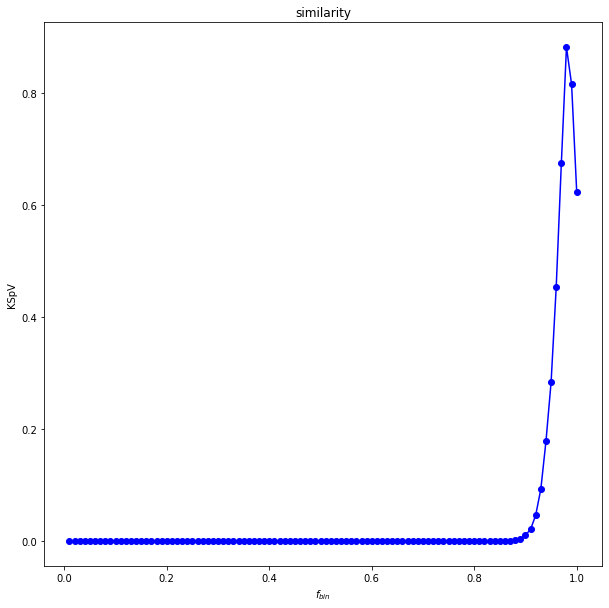

In [63]:
# list_sim = 1-(np.array(list_sim)/np.max(list_sim)) #归一化相似度
plt.figure(figsize=(10,10))
plt.title('similarity')
# plt.ylim(-0.1, 1.1)
plt.xlabel('$f_{bin}$')
plt.ylabel('KSpV')
plt.plot(grid_fbin, list_sim, '-o', color='blue', alpha=1)
# plt.legend()
plt.show()
plt.close()

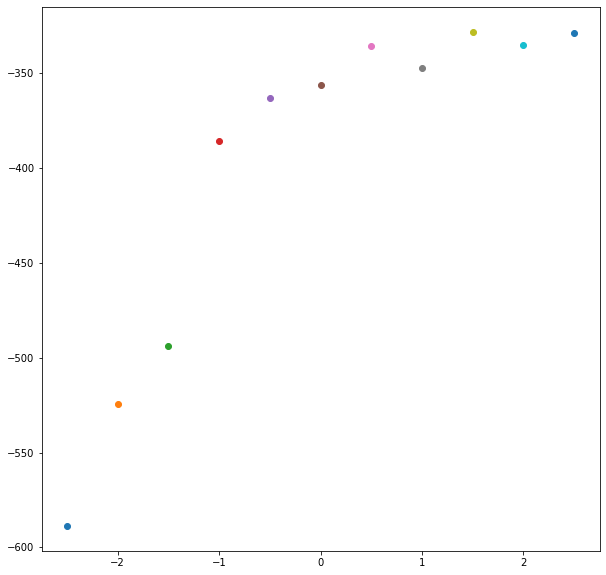

In [16]:
bfn = './binary/MockSamples/epsilon(1.00)/binary/pi(%.02f)/kappa(0.00)/eta(0.00)/binary(2000)epochs(06)epsilon(1.00)P(1,1400)q(0.1,1.0)e(0.0,0.9)m1(1,10)_(%.02f,0.00,0.00).npy'
pi_true = 2
binaries_obs = np.load(bfn%(pi_true, pi_true), allow_pickle=True)
singleStars_obs = np.load('binary/MockSamples/epsilon(0.10)/singleStar/singleStar(2000)epochs(06)epsilon(0.10).npy', allow_pickle=True)
sampleSize = 200
fbin_true = 0.5
samples = binaries_obs[:round(sampleSize*fbin_true)]
samples = np.concatenate((samples, singleStars_obs[:round(sampleSize * (1-fbin_true))]))

list_dtajrv_obs = []
for g in samples:
    # list_dtajrv_obs.append(np.diff(g['rvs']))
    for a in range(len(g['rvs'])-1):
        for b in range(a+1, len(g['rvs'])):
            list_dtajrv_obs.append(g['rvs'][b]-g['rvs'][a])
list_dtajrv_obs = np.ndarray.flatten(np.array(list_dtajrv_obs))


# print (list_dtajrv_obs)
plt.figure(figsize=(10,10))
for pi in [-2.5, -2.0, -1.5, -1.001, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5]:
    binaries = np.load(bfn%(pi, pi), allow_pickle=True)
    list_dtajrv_simul = []
    for g in binaries:
        # list_dtajrv_simul.append(np.diff(g['rvs']))
        for a in range(len(g['rvs'])-1):
            for b in range(a+1, len(g['rvs'])):
                list_dtajrv_simul.append(g['rvs'][b]-g['rvs'][a])
    list_dtajrv_simul = np.ndarray.flatten(np.array(list_dtajrv_simul))
    KSpv = max(1e-323, st.ks_2samp(list_dtajrv_obs, list_dtajrv_simul)[1])
    plt.plot(pi, np.log(KSpv), 'o')
plt.show()
plt.close()


In [18]:
print (sum(range(1,5)))

10
